In [1]:
# Importing all necessary libraries

import math

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

img_width, img_height = 320, 320

import os
dir = os.listdir('/v_data/train')
print(dir)

file_path = ('/v_data/train/.ipynb_checkpoints')
os.rmdir(file_path)
file_path = ('/v_data/test/.ipynb_checkpoints')
os.rmdir(file_path)

dir = os.listdir('/v_data/train')
print(dir)

['.ipynb_checkpoints', 'aster', 'ninestar']
['aster', 'ninestar']


In [2]:
train_data_dir = '/v_data/train'
validation_data_dir = '/v_data/test'
nb_train_samples = 100
nb_validation_samples = 10
epochs = 5
batch_size = 10


In [3]:
if K.image_data_format() == 'channels_first':
	input_shape = (3, img_width, img_height)
else:
	input_shape = (img_width, img_height, 3)


In [4]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [5]:
model.compile(loss='binary_crossentropy',
			optimizer='rmsprop',
			metrics=['accuracy'])


In [6]:
train_datagen = ImageDataGenerator(
	rescale=1. / 255,
	shear_range=0.2,
	zoom_range=0.2,
	horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
	train_data_dir,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
	validation_data_dir,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')

model.fit_generator(
	train_generator,
	steps_per_epoch=nb_train_samples // batch_size,
	epochs=epochs,
	validation_data=validation_generator,
	validation_steps=nb_validation_samples // batch_size)


Found 100 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
10/10 [==============================] - 14s 223ms/step - loss: 1.2117 - accuracy: 0.5700 - val_loss: 0.4163 - val_accuracy: 1.0000
Epoch 2/5
10/10 [==============================] - 2s 228ms/step - loss: 0.2439 - accuracy: 0.9300 - val_loss: 0.0596 - val_accuracy: 1.0000
Epoch 3/5
10/10 [==============================] - 2s 227ms/step - loss: 0.0950 - accuracy: 0.9500 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 4/5
10/10 [==============================] - 2s 229ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 5/5
10/10 [==============================] - 2s 227ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.9344e-04 - val_accuracy: 1.0000


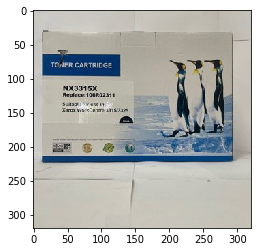

Predicted Class (0 - Aster , 1- Ninestar):  0.9999839
This is a Ninestar box


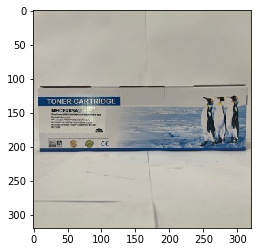

Predicted Class (0 - Aster , 1- Ninestar):  0.99992526
This is a Ninestar box


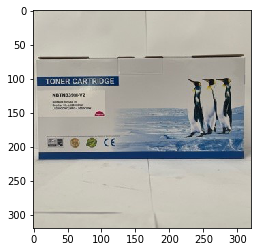

Predicted Class (0 - Aster , 1- Ninestar):  0.99999714
This is a Ninestar box


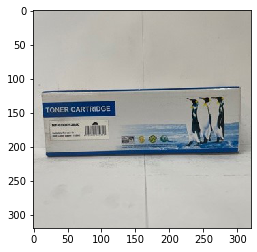

Predicted Class (0 - Aster , 1- Ninestar):  0.9998864
This is a Ninestar box


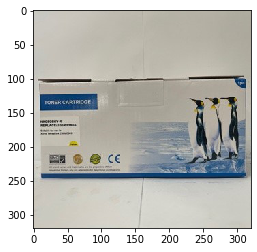

Predicted Class (0 - Aster , 1- Ninestar):  0.99999666
This is a Ninestar box


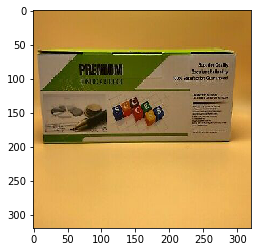

Predicted Class (0 - Aster , 1- Ninestar):  0.012346771
This is an Aster box


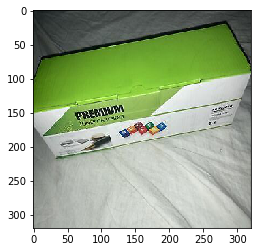

Predicted Class (0 - Aster , 1- Ninestar):  2.7714064e-09
This is an Aster box


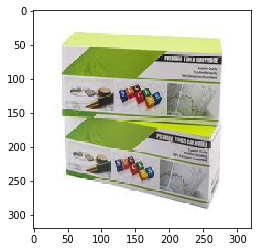

Predicted Class (0 - Aster , 1- Ninestar):  1.2104161e-06
This is an Aster box


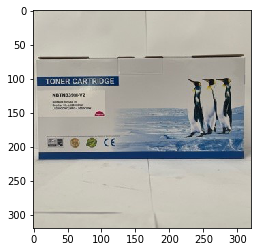

Predicted Class (0 - Aster , 1- Ninestar):  0.99999714
This is a Ninestar box


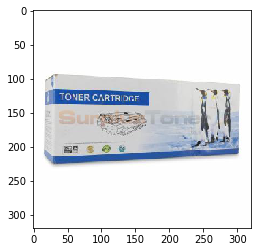

Predicted Class (0 - Aster , 1- Ninestar):  0.99904734
This is a Ninestar box


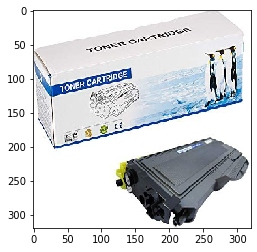

Predicted Class (0 - Aster , 1- Ninestar):  0.99991846
This is a Ninestar box


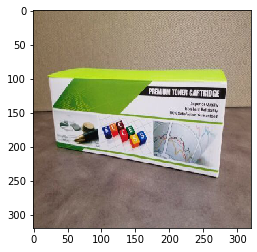

Predicted Class (0 - Aster , 1- Ninestar):  0.0034852903
This is an Aster box


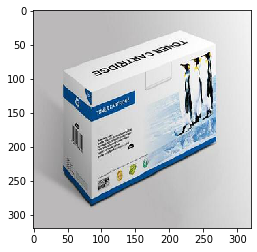

Predicted Class (0 - Aster , 1- Ninestar):  0.99903774
This is a Ninestar box


In [27]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np

for i in range(1,14):
  image = load_img('/v_data/test/ninestar/'+str(i)+'.jpg', target_size=(320, 320))
  img = np.array(image)
  img = img / 255.0
  from matplotlib import pyplot as plt
  plt.imshow(img, interpolation='nearest')
  plt.show()
  img = img.reshape(1,320,320,3)
  label = model.predict(img)
  print("Predicted Class (0 - Aster , 1- Ninestar): ", label[0][0])

  if label[0][0] > 0.5:
   print('This is a Ninestar box')
  else:
   print('This is an Aster box')

  


#after testing, images of ninestar or aster boxes from the internet classify properly, however if i grab some random image, like a plane
#it will still try to classify ninestar or aster
#i guess since this is binary classification and the output is one of 2 choices


#id like to make batch predictions, display the images im predicting, and also identify how exactly this is deciding what is what
#also, more insight on the training process
